In [ ]:
!pip install pgeocode
!pip install git+https://github.com/python-visualization/folium

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import random
import numpy as np
import pgeocode as pcode
import folium


### **Datasets**

In [ ]:
AgeGroupDetails="https://raw.githubusercontent.com/DeepanNarayanaMoorthy/COVID-19-Extensive-Analysis/master/datasets/AgeGroupDetails.csv"
ICMRTestingLabs="https://raw.githubusercontent.com/DeepanNarayanaMoorthy/COVID-19-Extensive-Analysis/master/datasets/ICMRTestingLabs.csv"
HospitalBedsIndia="https://raw.githubusercontent.com/DeepanNarayanaMoorthy/COVID-19-Extensive-Analysis/master/datasets/HospitalBedsIndia.csv"
StatewiseTestingDetails="https://raw.githubusercontent.com/DeepanNarayanaMoorthy/COVID-19-Extensive-Analysis/master/datasets/StatewiseTestingDetails.csv"
worldwide_happiness_report="https://raw.githubusercontent.com/DeepanNarayanaMoorthy/COVID-19-Extensive-Analysis/master/datasets/worldwide_happiness_report.csv"
covid19_Confirmed_dataset="https://raw.githubusercontent.com/DeepanNarayanaMoorthy/COVID-19-Extensive-Analysis/master/datasets/covid19_Confirmed_dataset.csv"

### **Age Group Details**

In [ ]:
age_det=pd.read_csv(AgeGroupDetails)
age_det.head()
# Cluster analysis Needed

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



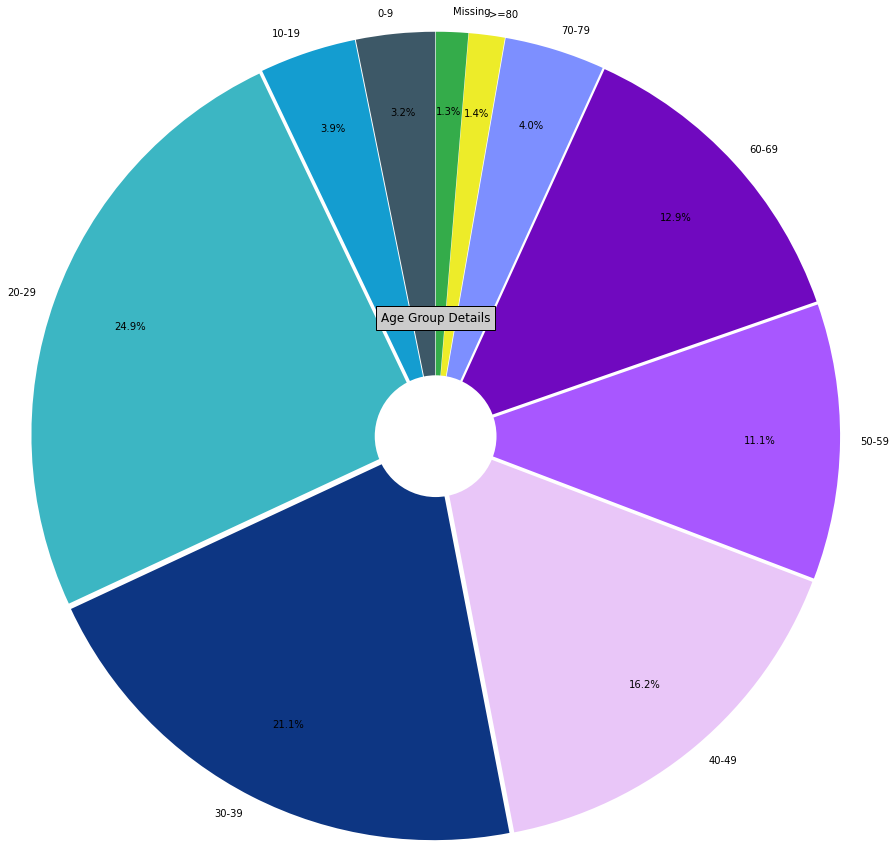

In [ ]:
# Pie chart
labels = age_det["AgeGroup"]
sizes = [float(i.replace('%', '')) for i in age_det["Percentage"]]
#colors
rowss=len(age_det.index)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(rowss)]
#explsion
explode = tuple([0.05 for i in range(rowss)])
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', 
        startangle=90,labeldistance=1.05, pctdistance=0.8, explode = explode, radius=4.6)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title("Age Group Details", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

### **Hospital Details**

In [ ]:
HospitalBedsIndia=pd.read_csv(HospitalBedsIndia)
HospitalBedsIndia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     int64  
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      30 non-null     float64
 5   NumDistrictHospitals_HMIS         37 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  37 non-null     int64  
 7   NumPublicBeds_HMIS                37 non-null     int64  
 8   NumRuralHospitals_NHP18           37 non-null     int64  
 9   NumRuralBeds_NHP18                37 non-null     int64  
 10  NumUrbanHospitals_NHP18           37 non-null     int64  
 11  NumUrbanBeds_NHP18                37 non-null     int64  
dtypes: float64

In [ ]:
HospitalBedsIndia.rename(columns={"State/UT": "State"}, inplace=True)
HospitalBedsIndia=HospitalBedsIndia.drop(["NumDistrictHospitals_HMIS", "TotalPublicHealthFacilities_HMIS", "NumPublicBeds_HMIS", 
                        "NumRuralHospitals_NHP18" ,"NumRuralBeds_NHP18" , "NumUrbanHospitals_NHP18", "NumUrbanBeds_NHP18" ], axis=1)
HospitalBedsIndia.tail()

,Sno,State,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS
31,32,Telangana,788,82,47.0
32,33,Tripura,114,22,12.0
33,34,Uttar Pradesh,3277,671,NaN
34,35,Uttarakhand,275,69,19.0
35,36,West Bengal,1374,406,70.0


In [ ]:
HospitalBedsIndia=HospitalBedsIndia[HospitalBedsIndia.State !="All India"]

x = HospitalBedsIndia["State"]
y = HospitalBedsIndia["NumPrimaryHealthCenters_HMIS"]
y_num=HospitalBedsIndia.astype({'NumPrimaryHealthCenters_HMIS': 'int32'})
y_num=y_num[["NumPrimaryHealthCenters_HMIS"]]
y_num_mean=y_num.mean()
# Use textposition='auto' for direct text
fig = go.Figure(layout_title_text="Number of Primary Health Centers")

fig.add_trace(
    go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
            name="Individual Values"
        ))

fig.add_trace(
    go.Scatter(
        x=x,
        y=[int(y_num_mean) for i in x],
         name="Average"
    ))

fig.show()

In [ ]:
HospitalBedsIndia=HospitalBedsIndia[HospitalBedsIndia.State !="All India"]

x = HospitalBedsIndia["State"]
y = HospitalBedsIndia["NumCommunityHealthCenters_HMIS"]
y_num=HospitalBedsIndia.astype({'NumCommunityHealthCenters_HMIS': 'int32'})
y_num=y_num[["NumCommunityHealthCenters_HMIS"]]
y_num_mean=y_num.mean()
# Use textposition='auto' for direct text
fig = go.Figure(layout_title_text="Number of Community Health Centers")

fig.add_trace(
    go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
            name="Individual Values"
        ))

fig.add_trace(
    go.Scatter(
        x=x,
        y=[int(y_num_mean) for i in x],
         name="Average"
    ))

fig.show()

In [ ]:
HospitalBedsIndia=HospitalBedsIndia[HospitalBedsIndia.State !="All India"]

x = HospitalBedsIndia["State"]
y = HospitalBedsIndia["NumSubDistrictHospitals_HMIS"]
HospitalBedsIndia=HospitalBedsIndia.replace([np.nan],0)
y_num=HospitalBedsIndia.astype({'NumSubDistrictHospitals_HMIS': 'int32'})
y_num=y_num[["NumSubDistrictHospitals_HMIS"]]
y_num_mean=y_num.mean()
# Use textposition='auto' for direct text
fig = go.Figure(layout_title_text="Number of Sub District Hospitals")

fig.add_trace(
    go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
            name="Individual Values"
        ))

fig.add_trace(
    go.Scatter(
        x=x,
        y=[int(y_num_mean) for i in x],
         name="Average"
    ))

fig.show()

### **ICMR Testing Labs**

In [ ]:
ICMRTestingLabs=pd.read_csv(ICMRTestingLabs)
ICMRTestingLabs=ICMRTestingLabs.drop(["address","city","state"], axis=1)
ICMRTestingLabs=ICMRTestingLabs.dropna(axis=1, how='any')
ICMRTestingLabs.info()
ICMRTestingLabs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      267 non-null    object
 1   pincode  267 non-null    int64 
 2   type     267 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


,lab,pincode,type
0,"ICMR-Regional Medical Research Centre, Port Blair",744103,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,791110,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,517507,Government Laboratory
3,"Rangaraya Medical College, Kakinada",533001,Government Laboratory
4,"Sidhartha Medical College, Vijaywada",520008,Government Laboratory


In [ ]:

map = folium.Map(
    location=[20.5937, 78.9629],
    zoom_start=5,
    tiles='Stamen Terrain'
)
for i in range(len(ICMRTestingLabs.index)-1):
  lat=float(dict(pcode.Nominatim('in').query_postal_code(str(ICMRTestingLabs["pincode"][i])))["latitude"])
  lon=float(dict(pcode.Nominatim('in').query_postal_code(str(ICMRTestingLabs["pincode"][i])))["longitude"])
  try:
    folium.Marker([lat,lon], popup='<b>'+str(ICMRTestingLabs["lab"][i])+'</b>', tooltip=str(ICMRTestingLabs["type"][i])).add_to(map)
  except:
    pass

map

### **State Wise Testing Details**

In [ ]:
StatewiseTestingDetails=pd.read_csv(StatewiseTestingDetails)
StatewiseTestingDetails.info()
for i in range(len(StatewiseTestingDetails.index)):
  StatewiseTestingDetails["Negative"][i]=StatewiseTestingDetails["TotalSamples"][i]-StatewiseTestingDetails["Positive"][i]
StatewiseTestingDetails.head(10)
StatewiseTestingDetails.State.unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778 entries, 0 to 2777
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2778 non-null   object 
 1   State         2778 non-null   object 
 2   TotalSamples  2778 non-null   float64
 3   Negative      1954 non-null   object 
 4   Positive      2769 non-null   float64
dtypes: float64(2), object(3)
memory usage: 108.6+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [121]:
fig = px.scatter_3d(StatewiseTestingDetails, 
                          x='Positive', 
                          y='TotalSamples', 
                          z='Date',
                          color='State')
fig.update_traces(mode='markers+lines')
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

### **COVID 19 World Level Database Analysis**

In [ ]:
corona_dataset_csv = pd.read_csv(covid19_Confirmed_dataset)
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,32,39,39,53,62,71,77,78,80,84,87,91,93,96,96,96,99,100,103,103,103,102,103,103,103,103,103,103,104,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,669,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863,2870,2886,2897,2926,2936,2957,2963,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


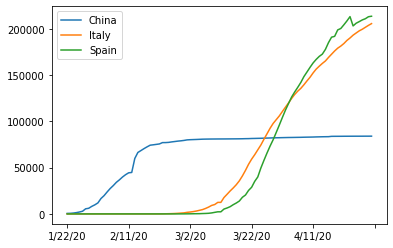

In [ ]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

Calculating a good measure

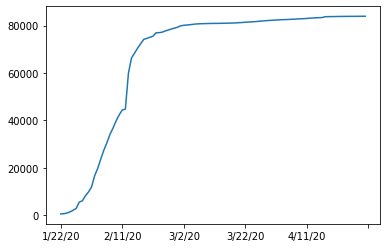

In [ ]:
corona_dataset_aggregated.loc['China'].plot()

maxmimum infection rate

In [ ]:
print(corona_dataset_aggregated.loc['China'].diff().max())
print(corona_dataset_aggregated.loc['Italy'].diff().max())
print(corona_dataset_aggregated.loc['Spain'].diff().max())

15136.0
6557.0
9630.0


maximum infection rate for all of the countries

In [ ]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated['max infection rate'] = max_infection_rates
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,5.0


### **WorldWide Happiness Report Analysis**

In [ ]:
world_happiness_report = pd.read_csv(worldwide_happiness_report)
columns_to_dropped = ['Overall rank','Score','Generosity','Perceptions of corruption']
world_happiness_report.drop(columns_to_dropped,axis=1 , inplace=True)
world_happiness_report.set_index(['Country or region'],inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Joining Datasets

In [ ]:
corona_data = pd.DataFrame(corona_dataset_aggregated['max infection rate'])
data = world_happiness_report.join(corona_data).copy()
data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
0,Finland,1.340,1.587,0.986,0.596,NaN
1,Denmark,1.383,1.573,0.996,0.592,NaN
2,Norway,1.488,1.582,1.028,0.603,NaN
3,Iceland,1.380,1.624,1.026,0.591,NaN
4,Netherlands,1.396,1.522,0.999,0.557,NaN
